In [28]:
from numpy import *; from numpy.core.records import fromarrays;from scipy.constants import *
from matplotlib.pyplot import *
import sys; sys.path.insert(0,'/home/noah/Desktop/large_analysis/ca_analysis/'); import os
import predefined as pd; import fileread as fr
import pickle
from scipy.signal import fftconvolve; from scipy.optimize import curve_fit
from numba import jit

path='/home/noah/Desktop/large_analysis/zeck_simulation/45Ca_082019/'
data=load(path+'45Ca_b0.npy')
data=pd.sim_restructure(data)
data=data.view(recarray)
data.timestamp=data.timestamp/4E-9
data=data[data.energy>25]
print(data.dtype)
print(data[0:50])

(numpy.record, [('entry', '<i4'), ('board', '<i4'), ('channel', '<i4'), ('timestamp', '<f4'), ('energy', '<f4')])
[( 2, 1, 3,   0.       ,  35.15957) ( 3, 4, 3,   0.       ,  41.5607 )
 ( 4, 1, 3,   4.       ,  40.0537 ) ( 5, 4, 3,   0.       ,  70.54315)
 ( 6, 1, 3,   0.       ,  85.28078) ( 7, 4, 3,   0.       , 191.258  )
 ( 8, 1, 3,   0.       , 108.2326 ) ( 9, 4, 3,   0.       ,  79.98771)
 (10, 4, 3,   0.       ,  44.14935) (12, 4, 3,   8.75     ,  55.13333)
 (14, 4, 3,   0.       , 141.6782 ) (15, 4, 3,   0.       ,  74.22788)
 (15, 1, 3,  23.5      ,  77.03623) (17, 1, 3,  10.5      ,  38.97376)
 (17, 4, 3,  35.500004 , 114.0249 ) (18, 4, 3,   0.       , 195.3999 )
 (19, 4, 3,   0.       , 121.7    ) (20, 4, 3, 108.25     ,  33.65371)
 (21, 1, 3,   0.       ,  77.24991) (22, 4, 3,   0.       ,  49.78253)
 (22, 1, 3,   8.       ,  95.59502) (24, 4, 3,   0.       , 183.6868 )
 (25, 4, 3,   0.       ,  94.1471 ) (26, 1, 3,   0.       ,  72.31494)
 (27, 1, 3,   0.       ,  29.0253 

In [30]:
@jit(nopython=True)
def coincidents(energies,boards,channels,timestamps,entry,t_window=250):
    t=np.zeros(len(boards))
    sum_energy=np.zeros(len(boards))
    i=0
    j=0
    count=0
    while i < len(boards)-2:
        j=i+1
        coinc = (timestamps[j]-timestamps[i] < t_window)*(entry[i]==entry[j])
        if coinc:
            t[i]=1
            sum_energy[i]=energies[i]+energies[j]
            count+=1
        i=j+1
    return sum_energy,count
        
dum=np.zeros(5,dtype=float)
# coincidents(dum,dum,dum,dum,dum)

t=((data.board==1)+(data.board==4))*(data.channel==3)
E,count=coincidents(data.energy[t],data.board[t],data.channel[t],data.timestamp[t],data.entry[t])

335383


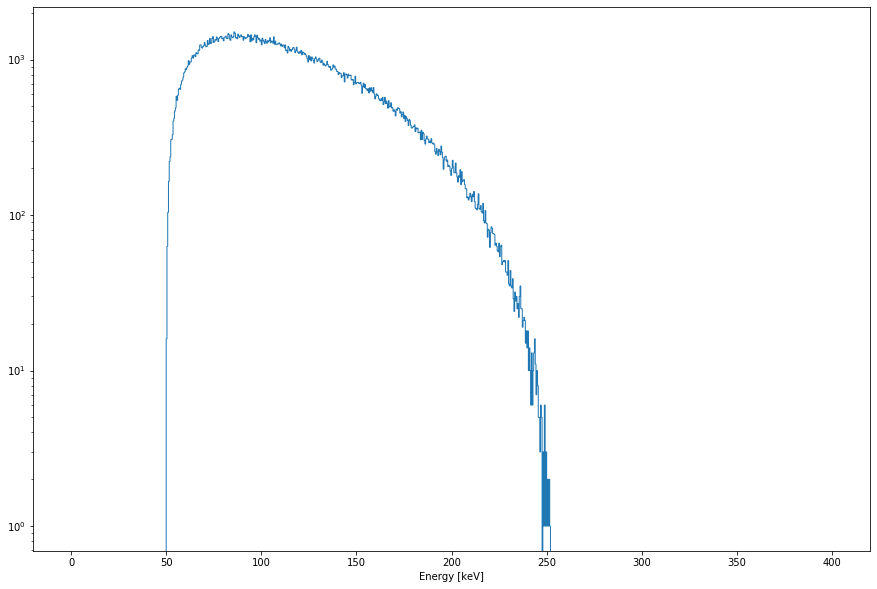

In [31]:
print(np.sum(E>0))

fig,ax=subplots(figsize=(15,10))
# for bdch in [11,12]:
# bd,ch=divmod(bdch,8)
ax.hist(E[E>0],bins=1000,range=[0,400],histtype='step')
ax.set_xlabel('Energy [keV]')
ax.set_yscale('log')
show()